In [1]:
from transformers import GPT2LMHeadModel

c:\Users\Zen\miniconda3\envs\tr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained ("gpt2") # 124M "gpt2-xl" -> 1.5B
sd_hf = model_hf.state_dict ()

for k, v in sd_hf.items():
    print (k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

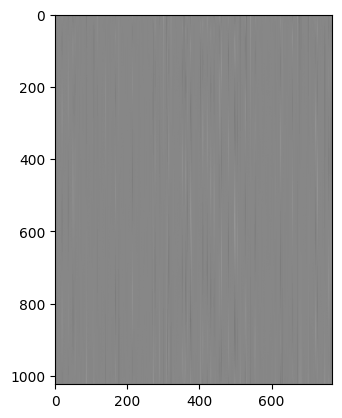

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

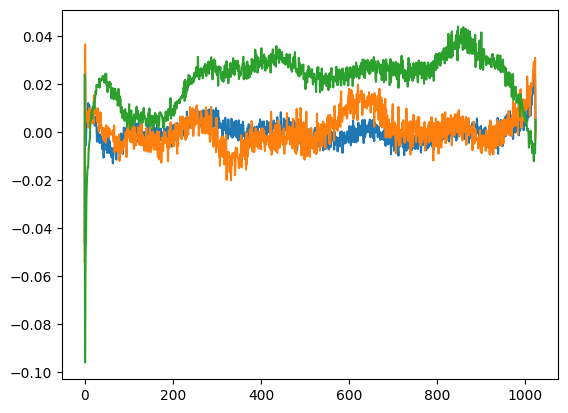

In [5]:
plt.plot (sd_hf["transformer.wpe.weight"][:, 150])
plt.plot (sd_hf["transformer.wpe.weight"][:, 200])
plt.plot (sd_hf["transformer.wpe.weight"][:, 250])

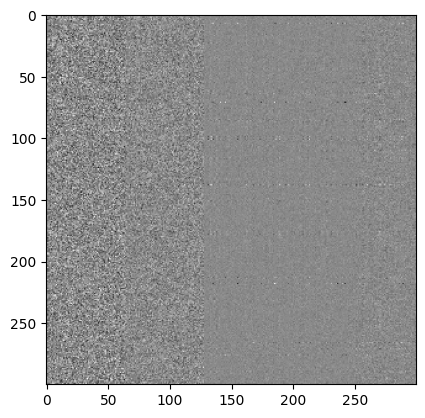

In [6]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="grey")

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline ('text-generation', model='gpt2')
set_seed(42)
generator("My name is Andrej Karpathy,", max_length=50, num_return_sequences=5)

c:\Users\Zen\miniconda3\envs\tr\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Zen\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will 

[{'generated_text': "My name is Andrej Karpathy, but what I do in that role is different—I've been here for nearly 12 years, and I've been there more than 90% of the time.\n\nI think that role of this guy"},
 {'generated_text': "My name is Andrej Karpathy, and I am the CEO and senior principal at OpenSecrets.org. I've worked extensively on cryptography and software security. For over 15 years I have worked at many different companies, ranging from technology companies"},
 {'generated_text': "My name is Andrej Karpathy, and I'll tell you if anyone has ever seen a bad movie as it's called, or even have any interest in a bad sequel, they usually know me by the way I talk to the people who"},
 {'generated_text': "My name is Andrej Karpathy, you name my wife, and you're my husband, a journalist who gave us our first cover story, about the plight of thousands of children, whose birth certificates don't show their names and the conditions in"},
 {'generated_text': 'My name is Andrej Karpathy,

: 

In [7]:
# Tiny Shakespeare Dataset
#!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

with open ('input.txt', 'r') as f:
    text = f.read ()
data = text[:1000] # first 1000 characters, GPT2 tokenizer has a compression ratio of about 3:1 so there's roughly 300 tokens in here
print (data[:100]) 

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [8]:
import tiktoken
enc = tiktoken.get_encoding ('gpt2')
tokens = enc.encode (data)
print (tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [9]:
import torch
buf = torch.tensor (tokens[:24 + 1]) # +1 because we need ground truth for the last token
x = buf[:-1].view (4, 6) # all elements not including the last one
y = buf [1:].view (4,6)
print (x)
print (y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [14]:
print (sd_hf['lm_head.weight'].shape)
print (sd_hf['transformer.wte.weight'].shape)

(sd_hf['lm_head.weight'] == sd_hf['transformer.wte.weight']).all()

torch.Size([50257, 768])
torch.Size([50257, 768])


tensor(True)

In [ ]:
# weight tying scheme that comes from the original attention is all you need paper and actually referenced before it
print (sd_hf['lm_head.weight'].data_ptr())
print (sd_hf['transformer.wte.weight'].data_ptr())

4476291252480
4476291252480


In [ ]:
# Residual Init!!
# standard deviation grows inside the residual stream
import torch
x = torch.zeros (768)
y = torch.zeros (768)
n = 100
for i in range (n):
    x+= n ** -0.5 * torch.randn (768)
    y += torch.randn (768)
x.std(), y.std(), y.var()

(tensor(1.0070), tensor(10.4347), tensor(108.8821))

- make it so that matrix multiplications use TF32 (instead of FP32) data type (10 mantissa bits stored explicityly)
- wherever possible to get 8x more FLOPS on paper (not in practice because of bandwidth and migration costs)
-  or treat each float32 number as the sum of two bfloat16 numbers (approximately 16 mantissa bits with 14 bits explicitly stored),
-  if the appropriate fast matrix multiplication algorithms are available. Otherwise float32 matrix multiplications are computed as if the precision is “highest”. 
- even though in principle TF32 offers a lot faster throughput, all these numbers are still float32s and its FP32s that are being shipped
- all over the place through the memory system, and it's just costing us way too much time to shovel around all this data
- albeit we have made the multiply itself faster, we are memory bound and we are not actually seeing the full benifit that would come
- from this napkin math here.
- Free, slightly more approximate (not gonna notice it basically), faster

### Mixed Precision:
- Somethings (token embedding tables) pytorch is keeping FP32 and somethings (activations, logits) pytorch is converting to lower precision.
#### BFLOAT16 autocast with torch:
- not all operations autocast to bfloat16 (same range as fp32 but less mantissa precision)
- things like softmax, layernorm, softmax, log softmax, lossfunction calcs, a lot of those remain in float32 because they are more
susceptible to precision changes.

- matrix multiplies are fairly robus to precision changes, so some parts of the network are impacted more or less by the precision change.
- so basically only some part of the model are running in reduced precision.
- Bfloat16 has the same sign and exponent bits so it can represent the same range as TF32 FP32 but has only 7 mantissa bits so lower precision
- The exponent sets the range that you can represent with your numbers.
- precision is how much precision you have for your numbers.
- range of numbers is identical but we have fewer possibilities within that range when we keep exponent and sign bit same but drop mantissa bits.
- we are truncating the mantissa therefore, we have less precision in that range.

- issue with FP16 is that it has same precision (mantissa bits) but reduced range (exponent bits), and thats where we start to run into issues because now we need these gradient scalers and things like that.
- but FP16 actually historically came first that was available in the Volta series before ampere, you had to use gradient scaling operation to not trip up the reduced range issues and its kind of annoying and its an additional source of state and complexity. 
- the reason for that was because the exponent range was reduced in FP16.
- Then they came out with BF16 in the Amepere.
- in TF32 we werent changing the numbers themselves their types that appear in our code, dropping to BF16 changes their type itself, there has to be casting.
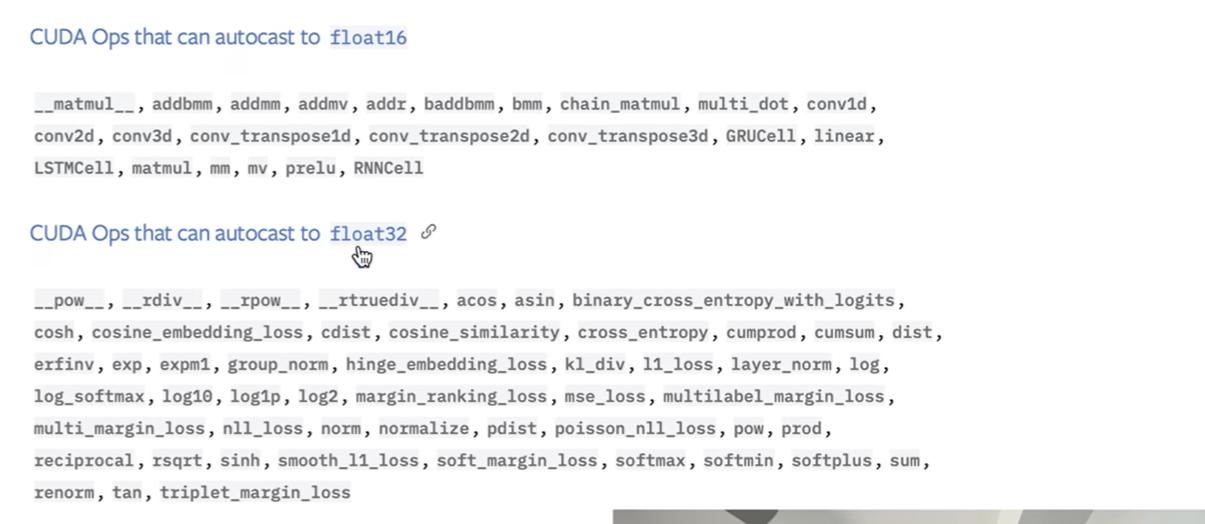

- Matrix multiplies are fairly robust to precision changes relative to, log, logsoftmax, loss function calc etc

In [3]:
# equivalent implementation to what's happening inside gelu to unpack what's going on with torch compile

# what would happen without torch.compile() ?

import torch.nn as nn
import math
class TanhGELU (nn.Module):
    def forward (self, input):
        return 0.5 * input * (1.0 + torch.tanh (math.sqrt (2.0 / math.pi) * (input + 0.44715 * torch.pow (input,3.0))))

### Ramping batch size in GPT2 trainng:
- It's not a major improvement or algorithmic optimization improvement it's more of a systems and speed improvement
- At the early stages of the optimization model is in a very atypical setting where it's mostly learning to ignore the tokens, that don't come up in trainng set very often.
- You're mostly learning very simple biases and that kind of a thing.
- Every single example that you put through your network is basically telling you, use these tokens and don't use these tokens.
- So gradients in the early stages of optimization from every single example are actually extremely highly correlated, they look roughly the same.
- Because all they're telling you is that these tokens appear and these tokens don't appear.
- Because gradients are all similar and they're highly correlated, then why are you doing batch sizes of millions, even if you are doing batch sizes of say 32k you're basically getting the exact same gradient early on in the training.
- And later when you've learned all the simple stuff that's when the actual work starts, gradients become more decorrelated for example and that's where they offer you sort of statistical power in some sense.
- so we're gonna skip this, just because it complicates things.
- Note that this train of thought makes sense because loss is evaluated in batches and gradients are propagated for a batch. Don't waste examples learning simple biases, that tell which tokens occur and drive down probabilities of tokens that never occur. either way they are similar so average loss should be similar for small batch that ramps up over time after driving simple biases.


In [2]:
import torch

a = torch.randn ((5,10))

a.numel()

50

In [3]:
import inspect  # Ensure the inspect module is imported

fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
print(f"Is 'fused' parameter available? {fused_available}")

Is 'fused' parameter available? True


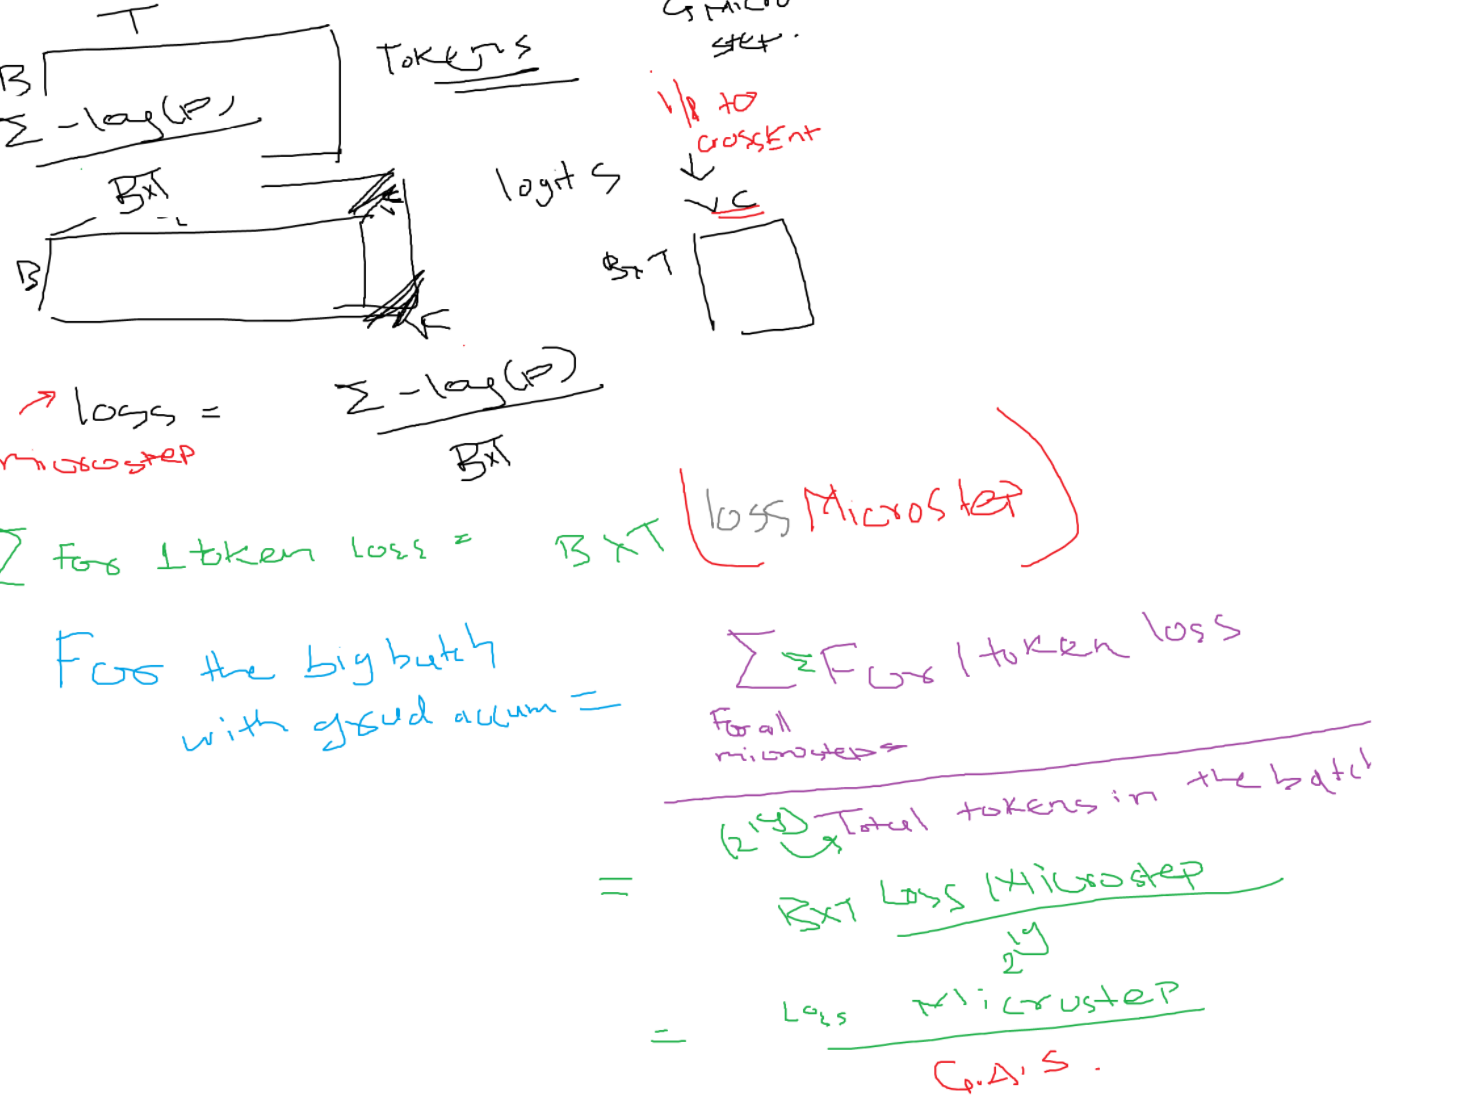

# Gradient Accumulation Example
- Loss of normalizing factor if done carelessly

In [7]:
import torch

# super simple little MLP

net = torch.nn.Sequential (
    torch.nn.Linear (16, 32),
    torch.nn.GELU (),
    torch.nn.Linear (32, 1)
)
torch.random.manual_seed (42)
x = torch.randn (4, 16)
y = torch.randn (4, 1)

net.zero_grad()
yhat = net (x)
loss = torch.nn.functional.mse_loss (yhat, y)
loss.backward ()
print (net[0].weight.grad.view(-1)[:10])

# the loss objective here is (due to reduction='mean')
# L = 1/4 * [
#                 (y[0] - yhat[0]) ** 2
#               + (y[1] - yhat[1]) ** 2
#               + (y[2] - yhat[2]) ** 2
#               + (y[3] - yhat[3]) ** 2
#           ]
# NOTE: 1/4!

tensor([-0.0150,  0.0011,  0.0042, -0.0040,  0.0059, -0.0080, -0.0078, -0.0138,
        -0.0103, -0.0134])


In [ ]:
# we need to match the results with gradient accumulation, now let's do it with grad_accum_steps of 4 and B = 1
# the loss objective here is different because
# accumulation in gradient <-----> SUM in loss
# i.e. we instead get:
# L0 = 1/4 (y[0] - yhat[0]) ** 2
# L1 = 1/4 (y[1] - yhat[1]) ** 2
# L2 = 1/4 (y[2] - yhat[2]) ** 2
# L3 = 1/4 (y[3] - yhat[3]) ** 2
# the losses in micro steps are sclaed by introducing the missing one quarters 
# gradients from all of these accumulate with a sum but now there's a one quarter inside every one of these components
# and now our losses will be equivalent
# L = L0 + L1 + L2 + L3 
# NOTE: the "normalizer" of 1/4 is lost!

grad_accum_steps = 4
net.zero_grad()
for i in range (grad_accum_steps):
    yhat = net (x[i])
    loss = torch.nn.functional.mse_loss (yhat, y[i]) / grad_accum_steps # it won't match if we don't normalize by grad_accum_steps
    loss.backward ()

print (net[0].weight.grad.view(-1)[:10])


tensor([-0.0150,  0.0011,  0.0042, -0.0040,  0.0059, -0.0080, -0.0078, -0.0138,
        -0.0103, -0.0134])


- #### Averaging is an associative operation
- imagine as sums of fractions for better visualization of associative property
- loss.backward() deposits gradients, it corresponds to sum in objective for gradient accumulation
- we scale down the losses for each micro step by grad_accum_steps before depositing gradients to recover the lost normalizer
- so that when we do loss.backward() which corresponds to sum in the objective, we are already summing up the gradients corresponding to the already normalized loss
- now the gradients will come out the same as the original optimization

## Flash Attention
- Being aware of memory heirarchy
- Flops dont matter
- The emtire memory access pattern is the bottleneck and that's what matters
- Torch compile is amazing but there are many still optimizations available to us that potentially torch.compile can not find
- Online normalizer method for calculating softmax.

## Nice numbers:
- Bumping numbers up to be power of 2 might increase the number of flops but it still can increase throughput as cuda and nn kernels go really well with powers of 2.
- Because ugly numbers hae their special case handling logic and things like that.

# Making Vocab Size a nice number:
- Adding spurious tokens to make the vocab size, to address the inefficiency in the bottleneck matrix mult in the transformer, to nice number won't break the code.
- The network just has extra tokens which are not found in the dataset  and these embeddings are never indexed into, the embedding tokens are weight shared at language modeling head as well
- The logits produced by the network drive the probabilities produced for these spurious tokens down to zero.
- It's the same as tiny shakespeare using only 2k tokens out of 50257 and logits for rest being driven down to zero.
- most of the tokens are already being driven down to zero by the optimization we've just introduced a few more tokens now that in a similar manner will never be used and have to be driven to zero in probability.
- functionally nothing breaks, we're just using a bit more extra memory. But otherwise this is a harmless operation, but we're adding calculations but it's running faster.
- It's running faster because in CUDA so many kernels use block tiles, and the block tiles are usually nice numbers and use powers of 2, so calculations are done in chunks of 64 or chunks of 32.
- When your desired calculation doesn't neatly fit into these block tiles, there are all kinds of boundary kernels that can kick in to like, do the last part haha.
- In a lot of kernels, they will chunkate up your inputs and do the nice parts first and then have a second phase where they come back to the remainder and process the remainder, the kernels for that can be very inefficient
- So you're basically spinning up this extra compute and that's extremely inefficient so might as well pad your inputs and make it fit nicely and usually that ends up empirically running faster.

In [ ]:
import math

warmup_steps = 30
max_lr = 6e-4
min_lr = 0.1 * max_lr
max_stpes = 60
def get_lr (it):
    if it < warmup_steps:
        return max_lr * (it+1)/warmup_steps
    elif it > max_stpes:
        return 0.1*max_lr
    else:
        decay_ratio = (it - warmup_steps) / (max_stpes-warmup_steps)
        assert 0 <= decay_ratio <= 1
        coeff = 0.5 * (1.0 + math.cos (math.pi * decay_ratio)) # starts at 1 decays till 0
        return min_lr + coeff * (max_lr-min_lr)
